<h3 style='background:deeppink; border:0; color:white'><center>Decision Trees</center></h3>

<p align="center">
  <img src="https://static.vecteezy.com/system/resources/previews/001/234/042/non_2x/decision-tree-design-vector.jpg" alt="drawing" width="1000"/>
</p>

> * Decision trees are a popular machine learning algorithm used for classification and regression tasks.
> * They work by partitioning the input space into regions based on a set of rules, with each region being associated with a specific output.
> * A decision tree is built by recursively splitting the input space based on the best split that maximizes the separation between the classes or the reduction of variance.
> * Each node represents a decision based on a feature value, and each branch represents an outcome of that decision.
> * The root node represents the entire input space, and the leaf nodes represent the final classification.
> * The goal is to minimize impurity at each node, which is achieved by finding the split that results in the lowest possible impurity measure, such as the Gini index or entropy.

<h3>Navigation</h3>

* [**Gini Index**](#100)
  
* [**Gini Index split**](#200)

* [**Entropy**](#300)

* [**Decision Making**](#400)

<a id=100></a>
<h3 style='background:darkgreen'><center>Gini Index</center></h3>

> * The Gini index is a measure of impurity that determines the quality of a split based on the distribution of classes in the resulting subsets.
> * It can be calculated for a given set of samples using the formula: Gini Index = 1 - ∑(pi^2), where pi is the proportion of samples in the i-th class.
> * The Gini index ranges from 0 to 1, where a Gini index of 0 indicates a perfect separation of the classes and a Gini index of 1 indicates that the classes are equally distributed among the subsets.
> * The goal when building a decision tree is to minimize the Gini index at each node by finding the split that results in the lowest possible Gini index.
> * The Gini index tends to work well with imbalanced datasets, where one class has significantly more samples than the others.
> * One of the advantages of using the Gini index is its efficiency, as it is faster to compute than other measures of impurity such as entropy.


$$
GINI(t) = 1 - \displaystyle\sum_{j} P(i)^2
$$


In [201]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import graphviz
import dtreeviz 
from sklearn.tree import *
from sklearn import tree

In [202]:
# create the test data
data = [
    ['x1', 'some', 'Burger', 'yes', 'no'],
    ['x2', 'full', 'Thai', 'yes', 'yes'],
    ['x3', 'some', 'Burger', 'no', 'yes'],
    ['x4', 'full', 'Thai', 'yes', 'yes'],
    ['x5', 'some', 'French', 'no', 'no'],
    ['x6', 'full', 'Italian', 'yes', 'yes'],
    ['x7', 'none', 'French', 'no', 'no'],
    ['x8', 'some', 'Thai', 'yes', 'no'],
    ['x9', 'none', 'Burger', 'no', 'yes'],
    ['x10', 'full', 'Italian', 'no', 'no'],
    ['x11', 'none', 'Thai', 'no', 'no'],
    ['x12', 'full', 'Burger', 'yes', 'yes']
]

# write the data to a CSV file
with open('test.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Samples', 'Patrons', 'Type', 'Hungry', 'Decision-label'])
    for row in data:
        writer.writerow(row)



In [203]:
df = pd.read_csv('test.csv')

Our test data

In [204]:
df

,Samples,Patrons,Type,Hungry,Decision-label
0,x1,some,Burger,yes,no
1,x2,full,Thai,yes,yes
2,x3,some,Burger,no,yes
3,x4,full,Thai,yes,yes
4,x5,some,French,no,no
5,x6,full,Italian,yes,yes
6,x7,none,French,no,no
7,x8,some,Thai,yes,no
8,x9,none,Burger,no,yes
9,x10,full,Italian,no,no


There are essentially multiple ways to write a gini index method
one way is to do it like this

In [205]:
import numpy as np
def gini_impurity(y):
  '''
  Given a Pandas Series, it calculates the Gini Impurity. 
  y: variable with which calculate Gini Impurity.
  '''
  if isinstance(y, pd.Series):
    p = y.value_counts()/y.shape[0]
    gini = 1-np.sum(p**2)
    return(gini)

  else:
    raise('Object must be a Pandas Series.')

print(f'The gini index for Patrons is: {gini_impurity(df.Patrons):.3f}')

The gini index for Patrons is: 0.653


### Another way to do it is to do it in the 5 steps 

> **Step 1:** Calculate the total number of samples
> 
> **Step 2:** Calculate the number of samples in each class
> 
> **Step 3:** Calculate the proportion of samples in each class
> 
> **Step 4:** Calculate the squared proportion of samples in each class
> 
> **Step 5:** Calculate the Gini index

In [206]:
def calculate_gini_index(data, target_variable):
    # Step 1: Calculate the total number of samples
    total_samples = len(data)

    # Step 2: Calculate the number of samples in each class
    class_counts = data[target_variable].value_counts()

    # Step 3: Calculate the proportion of samples in each class
    class_proportions = class_counts / total_samples

    # Step 4: Calculate the squared proportion of samples in each class
    class_proportions_squared = class_proportions.apply(lambda x: x**2)

    # Step 5: Calculate the Gini index
    gini_index = 1 - class_proportions_squared.sum()

    return gini_index

print(f'the Gini Index for Patrons is: {calculate_gini_index(df, "Patrons"):.3f}')
print(f'the Gini Index for Type is: {calculate_gini_index(df, "Type"):.3f}')
print(f'the Gini Index for Hungry is: {calculate_gini_index(df, "Hungry"):.3f}')
print(f'the Gini Index for Decision-label is: {calculate_gini_index(df, "Decision-label"):.3f}')

the Gini Index for Patrons is: 0.653
the Gini Index for Type is: 0.722
the Gini Index for Hungry is: 0.500
the Gini Index for Decision-label is: 0.500


In [207]:
df

,Samples,Patrons,Type,Hungry,Decision-label
0,x1,some,Burger,yes,no
1,x2,full,Thai,yes,yes
2,x3,some,Burger,no,yes
3,x4,full,Thai,yes,yes
4,x5,some,French,no,no
5,x6,full,Italian,yes,yes
6,x7,none,French,no,no
7,x8,some,Thai,yes,no
8,x9,none,Burger,no,yes
9,x10,full,Italian,no,no


In [208]:
print(f"The total nummber of samples is: {len(df['Type'])}\nThe classes in Type are: {df['Type'].unique()}")
print(f"The number of burgers are: {len(df[df['Type']=='Burger'])}")
print(f"The number of Thai are: {len(df[df['Type']=='Thai'])}")
print(f"The number of French are: {len(df[df['Type']=='French'])}")
print(f"The number of Italian are: {len(df[df['Type']=='Italian'])}")

The total nummber of samples is: 12
The classes in Type are: ['Burger' 'Thai' 'French' 'Italian']
The number of burgers are: 4
The number of Thai are: 4
The number of French are: 2
The number of Italian are: 2


### Let's manually calculate them to check if our method is correct (Type)

> **Step 1:** Calculate the total number of samples
>> n = 12
> 
> **Step 2:** Calculate the number of samples in each class
>> Burgers=4, Thai=4, French=2, Italian=2
> 
> **Step 3:** Calculate the proportion of samples in each class
>> $ Propotion = \frac {class}{Total}$
>> 
>> $ Burgers= \frac {4}{12}$, $ Thai= \frac {4}{12}$, $ French= \frac {2}{12}$, $ Italian= \frac {2}{12}$
> 
> **Step 4:** Calculate the squared proportion of samples in each class
>> $ Burgers= \frac {1}{9}$, $ Thai= \frac {1}{9}$, $ French= \frac {1}{36}$, $ Italian= \frac {1}{36}$
> 
> **Step 5:** Calculate Sum of Samples
>> $ 1 - {(\frac {1}{9} \times 2 + \frac {1}{36} \times 2)} = 0.722 $

<a id=200></a>
<h3 style='background:purple'><center>Gini Split</center></h3>

> The Gini Split is a measure of impurity reduction that is used in decision tree algorithms to evaluate how well a split separates the data into more homogeneous subsets. It is calculated as a weighted average of the Gini indices of the two child nodes that result from the split.
> 
> The Gini Split formula takes into account the size of each child node and their corresponding Gini indices. If a split produces child nodes that are very homogeneous, meaning they contain predominantly one class of samples, then the Gini Split value will be low. Conversely, if a split produces child nodes that are more heterogeneous, meaning they contain a mix of different classes of samples, then the Gini Split value will be higher.
> 
> Decision tree algorithms aim to find the split that yields the lowest Gini Split value, as this indicates the greatest impurity reduction and leads to more accurate predictions. By recursively applying the Gini Split criterion at each internal node of the tree, the algorithm constructs a tree that efficiently partitions the data into homogeneous subsets and facilitates accurate classification of new samples

---

$ \text{Gini Split}(D_p,D_{left},D_{right}) = \frac{N_{left}}{N_p} Gini(D_{left}) + \frac{N_{right}}{N_p} Gini(D_{right}) $
<br>
<b>where:</b>

- $D_p$: the dataset of the parent node
- $D_{left}$: the dataset of the left child node
- $D_{right}$: the dataset of the right child node
- $N_p$: the total number of samples in the parent node
- $N_{left}$: the number of samples in the left child node
- $N_{right}$: the number of samples in the right child node
- $Gini(D)$: the Gini index of dataset D

---

<h3><center>Example on gini split calculation</center></h3>

Assuming that wwe need to calculate the Gini split for Type. Then we need to evaluate the impurity reduction as explained earlier. 

First, the weighted Average of the Gini indices of the child nodes
Let's assume we split the dataset based on whether the "Type" is "thai" or not. This results in two child nodes:

> **Node 1:** "Type" is "thai"
>>
>> 4 samples (all "thai"). So the Gini Index = 0 since all samples are of the same class
>>
>> $\text{Gini Index} = 1 - [\frac {4}{4}] ====> 1 - 1 = 0$
>
>
> **Node 2:** "Type" is not "thai"
>>    8 samples (4 "burger", 2 "french", and 2 "italian")
>>
>> $\text{Gini Index} = 1 - [(\frac {4}{8})^2 + (\frac {2}{8})^2 + (\frac {2}{8})^2] = 0.625$
> 
>**Gini Split:** calculated as the weighted average of the Gini indices of the two child nodes, where the weights are proportional to the size of each child node:
>
>> $ \text{Gini Split} = \frac {4}{12} \times 0 + \frac{8}{12} \times 0.625 = 0.417 $
>
> **Impurity Reduction:** if we split the data based on whether the "Type" is "thai" or not, we can achieve an impurity reduction of 0.305, which is the difference between the Gini Index of the parent node (0.722) and the Gini Split of the split (0.417). We can compare this value with the Gini Split values resulting from other potential splits to find the best one that maximizes impurity reduction.
>
>> $ \text{Impurity reduction} = |0.722 - 0.417|$ 
>> 
>> $\text{Impurity reduction} = 0.305$

<a id=300></a>
<h4 style='background:crimson; color:white'><center>Entropy Splitting</center></h4>

> * Entropy is a measure of impurity used in decision trees.
> 
> * Entropy measures the randomness or uncertainty of a set of data.
> 
> * In decision trees, Entropy splitting is used to find the split point that minimizes the entropy of the subsets.
> 
> * The split with the lowest entropy is considered the best split.
> 
> * The formula for entropy is:
> 
> * $ E = [-p1 \times log{_2}(p1)] - [p2 \times log{_2}(p2)] - ...... - [pn \times log{_2}(pn)]$
> 
> * where p1, p2, ..., pn are the proportions of the different classes in the data.
> 
> * To calculate the entropy for a split, we first calculate the entropy for each subset and then combine them using weighted average.

---

<h3><center>Example on Entropy Split Calculation</center></h3>

> **Proportion**
>> - $ Thai: \frac {4}{12} = 0.333$
>> - $ Burger: \frac {4}{12} = 0.333$
>> - $ French: \frac {2}{12} = 0.167$
>> - $ Italian: \frac {2}{12} = 0.167$
>
> **Entropy**
>> - $ Thai = -0.333\log{_2}(0.333) ====> Thai = 0.528$
>> - $ Burger: -0.333\log{_2}(0.333) ====> Burger = 0.528$
>> - $ French: -0.167\log{_2}(0.167) ====> French = 0.346$
>> - $ Italian: -0.167\log{_2}(0.167) ====> Italian = 0.346$

> **Weighted average entropy**
>> $\text{Weighted Average Entropy} = (0.3330 \times 0.528) + (0.3330 \times 0.528) + (0.1670 \times 0.346) + (0.1670 \times 0.346) = 0.918$

<a id=400></a>
<h3 style='background:skyblue; color:black'><center>Decision Making of decision tree</center></h3>

* we will use the most simple beginner friendly dataset the classic Iris dataset
* Split the data
* Create our Decision Tree model
* Fit the model to the train data
* Visualize the decision making using different techniques

In [209]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

Fit the classifier with default hyper-parameters

In [210]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

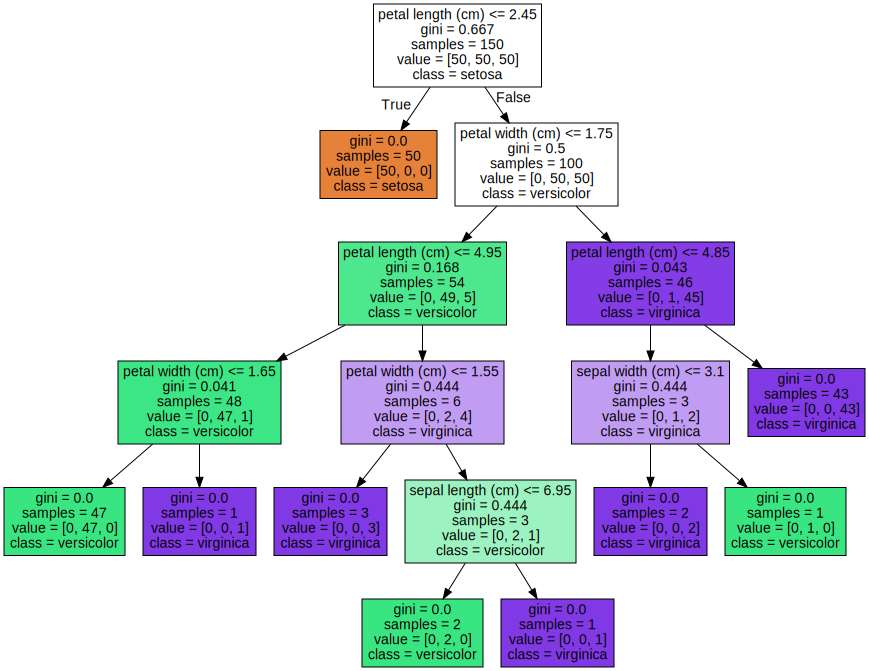

In [211]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

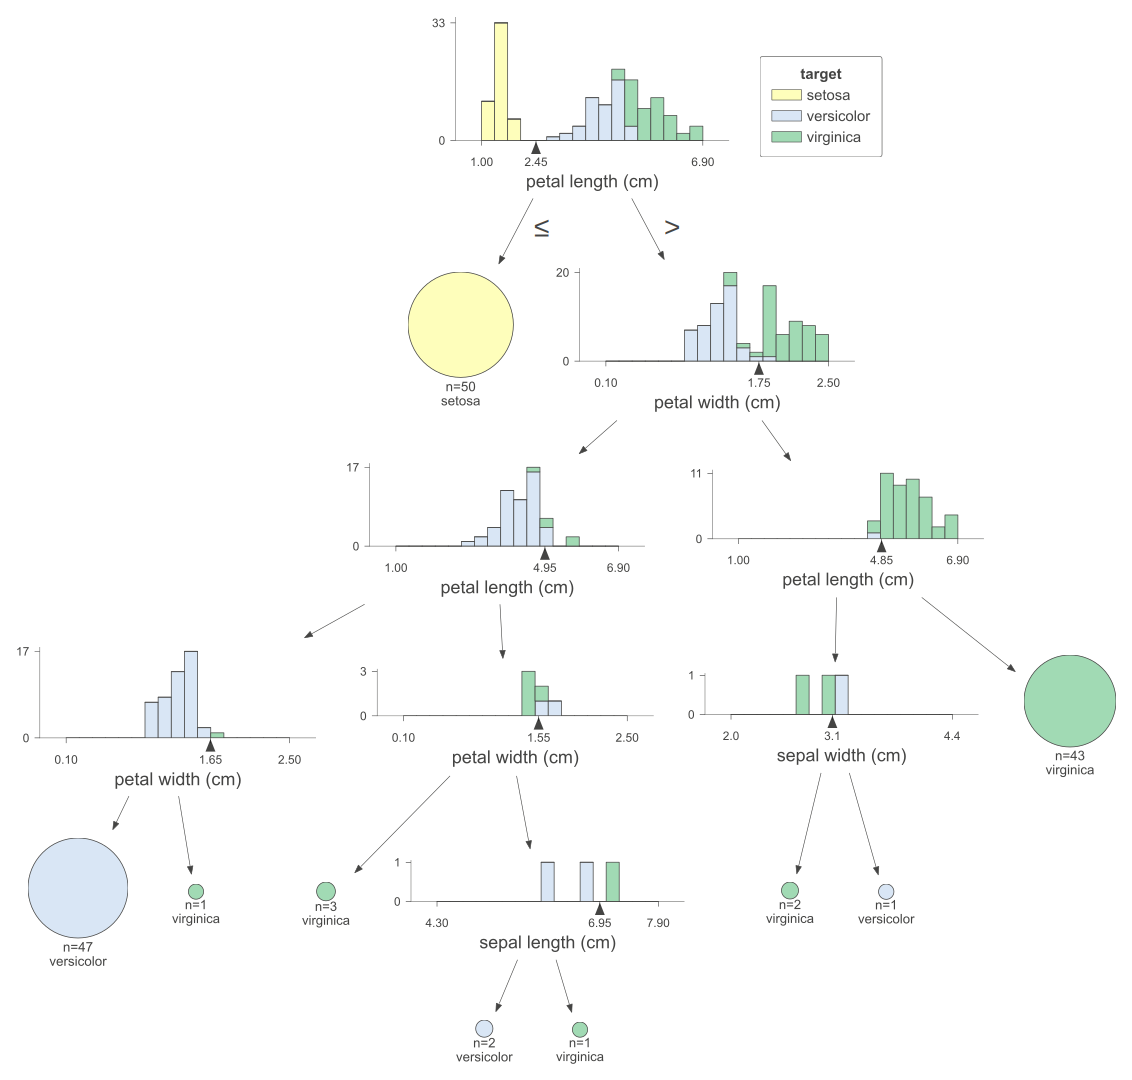

In [213]:
clf2 = DecisionTreeClassifier(random_state=1234)
model2 = clf2.fit(X, y)

viz = dtreeviz.model(clf2, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz.view(scale=2)